In [1]:
# reff : https://www.kaggle.com/code/adhittio/jpx-stock-analysis-prediction/edit

In this notebook we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)
   

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [2]:
#!pip install -q hvplot
# !pip install --upgrade pandas
#!pip install --upgrade pandas-datareader
!pip install -q yfinance


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import pandas_datareader.data as web
import yfinance as yf

from keras.models import Sequential
from keras.layers import Dense, LSTM
# For time stamps

from datetime import datetime


## TOP STOCK INDONESIA

## CRYPTOCURRENCIES

## BLUECHIP

In [4]:
start = datetime(2020,5,22)
#end = datetime.now()  #
end =datetime(2022, 5, 20)

company=[]
i=0
for clist in ['FB','TSLA','AAPL','NDX','AMZN','MSFT','NVDA','BABA','GOOGL']:
#for clist in ['NFLX','NIO','BA','AMD','DIS','INTC','KO','PFE','MRNA']:
    
    #print(clist)
    B = web.DataReader([clist], 'yahoo', start, end)
    B=pd.DataFrame(B.to_records())
    B.columns=['Date','Adj Close','Close','High','Low','Open','Volume']
    B["company_name"]=clist
    if i ==0 :
        company=B    
    else:
        company=company.append(B)    
    i+=1
    
company=company.set_index('Date')

FB=company[company['company_name']=='FB']
TSLA=company[company['company_name']=='TSLA']
AAPL=company[company['company_name']=='AAPL']
NDX=company[company['company_name']=='NDX']
AMZN=company[company['company_name']=='AMZN']
MSFT=company[company['company_name']=='MSFT']

NVDA=company[company['company_name']=='NVDA']
BABA=company[company['company_name']=='BABA']
GOOGL=company[company['company_name']=='GOOGL']

"""
NFLX=company[company['company_name']=='NFLX']
NIO=company[company['company_name']=='NIO']
BA=company[company['company_name']=='BA']
AMD=company[company['company_name']=='AMD']
DIS=company[company['company_name']=='DIS']
INTC=company[company['company_name']=='INTC']
KO=company[company['company_name']=='KO']
PFE=company[company['company_name']=='PFE']
MRNA=company[company['company_name']=='MRNA']
"""


company_list=[FB,TSLA,AAPL,NDX,AMZN,MSFT,NVDA,BABA,GOOGL]
tech_list=['FB','TSLA','AAPL','NDX','AMZN','MSFT','NVDA','BABA','GOOGL']
company_name=['FB','TSLA','AAPL','NDX','AMZN','MSFT','NVDA','BABA','GOOGL']

#company_list=[NFLX,NIO,BA,AMD,DIS,INTC,KO,PFE,MRNA]
#tech_list=['NFLX','NIO','BA','AMD','DIS','INTC','KO','PFE','MRNA']
#company_name=['NFLX','NIO','BA','AMD','DIS','INTC','KO','PFE','MRNA']

company

df=company.copy()

print(df.groupby('company_name').size())
display('df.describe()',df.describe())
df.info()

company_name
AAPL     504
AMZN     504
BABA     504
FB       504
GOOGL    504
MSFT     504
NDX      504
NVDA     504
TSLA     504
dtype: int64


'df.describe()'

Adj Close         Close          High           Low          Open  \
count   4536.000000   4536.000000   4536.000000   4536.000000   4536.000000   
mean    2287.486321   2287.837658   2310.443604   2263.820293   2288.883513   
std     4119.544723   4119.367622   4151.228816   4083.657465   4120.667047   
min       76.760002     76.760002     79.677498     73.279999     75.099998   
25%      200.888950    202.725002    205.407497    199.829994    202.739002   
50%      304.769028    305.240005    310.070007    300.929993    305.799988   
75%     2665.645081   2665.645081   2685.549988   2627.215027   2663.517456   
max    16573.339844  16573.339844  16764.859375  16523.830078  16644.769531   

             Volume  
count  4.536000e+03  
mean   5.688555e+08  
std    1.562030e+09  
min    4.656000e+05  
25%    1.165230e+07  
50%    2.558055e+07  
75%    6.302555e+07  
max    1.110216e+10

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4536 entries, 2020-05-22 to 2022-05-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Adj Close     4536 non-null   float64
 1   Close         4536 non-null   float64
 2   High          4536 non-null   float64
 3   Low           4536 non-null   float64
 4   Open          4536 non-null   float64
 5   Volume        4536 non-null   float64
 6   company_name  4536 non-null   object 
dtypes: float64(6), object(1)
memory usage: 283.5+ KB


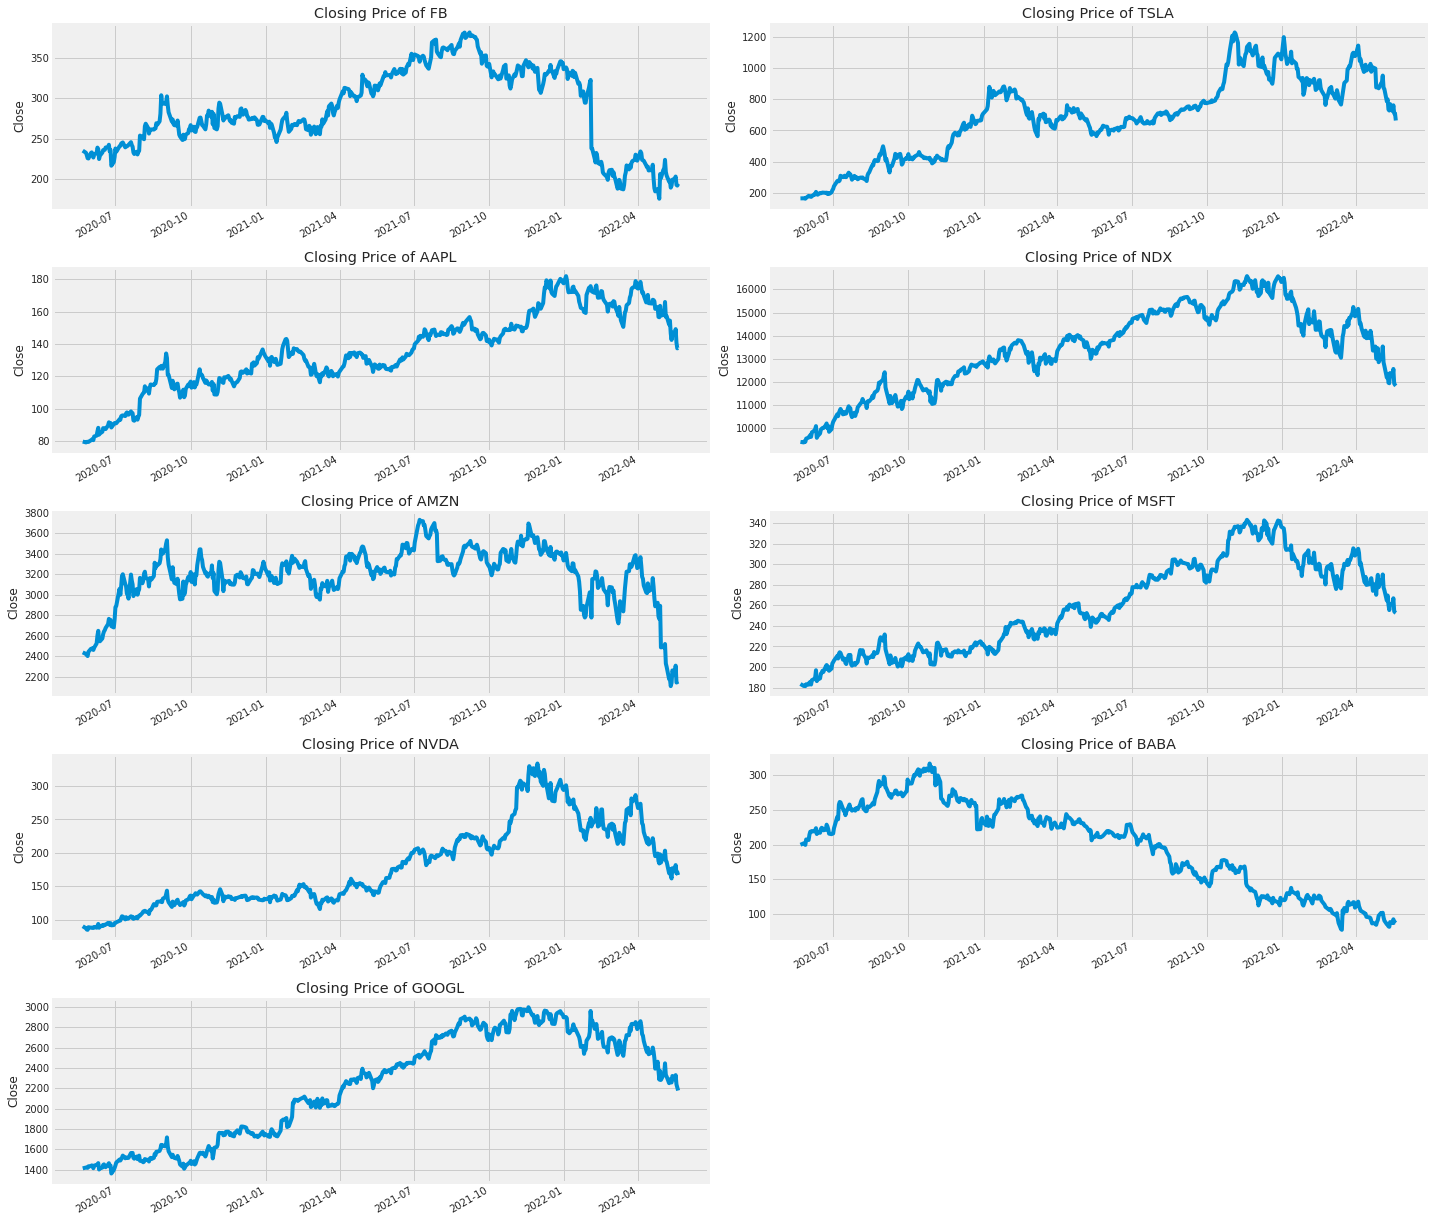

In [5]:
# Let's see a historical view of the closing price

plt.figure(figsize=(20, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    #print(company)
    plt.subplot(6, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")
    
plt.tight_layout()

In [6]:
#company_list=[FB,TSLA,AAPL,NDX,AMZN,MSFT,NVDA,BABA,GOOGL]
#tech_list=['FB','TSLA','AAPL','NDX','AMZN','MSFT','NVDA','BABA','GOOGL']
#company_name=['FB','TSLA','AAPL','NDX','AMZN','MSFT','NVDA','BABA','GOOGL']

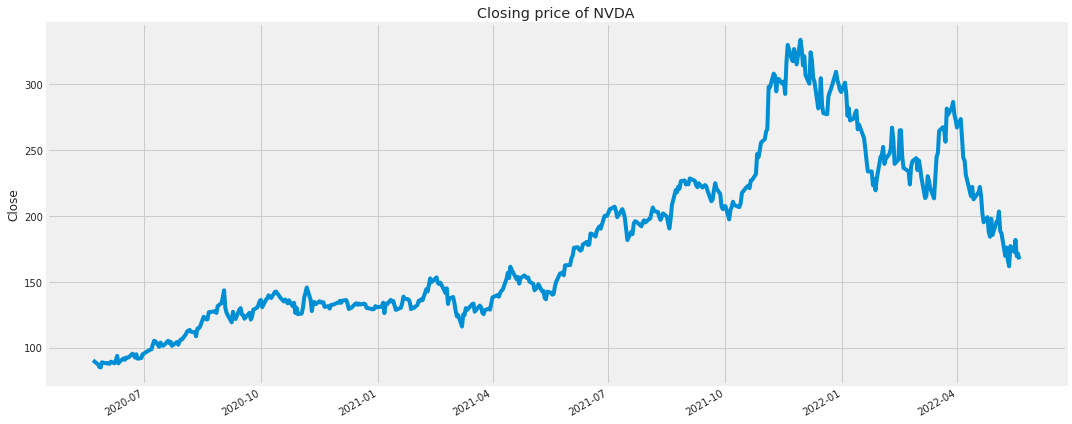

In [7]:
# Let's see a historical view of the closing price

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

#for i, company in enumerate(company_list, 1):
#plt.subplot(2, 2, i)
NVDA['Close'].plot()
plt.ylabel('Close')
plt.xlabel(None)
plt.title("Closing price of NVDA")
    
plt.tight_layout()

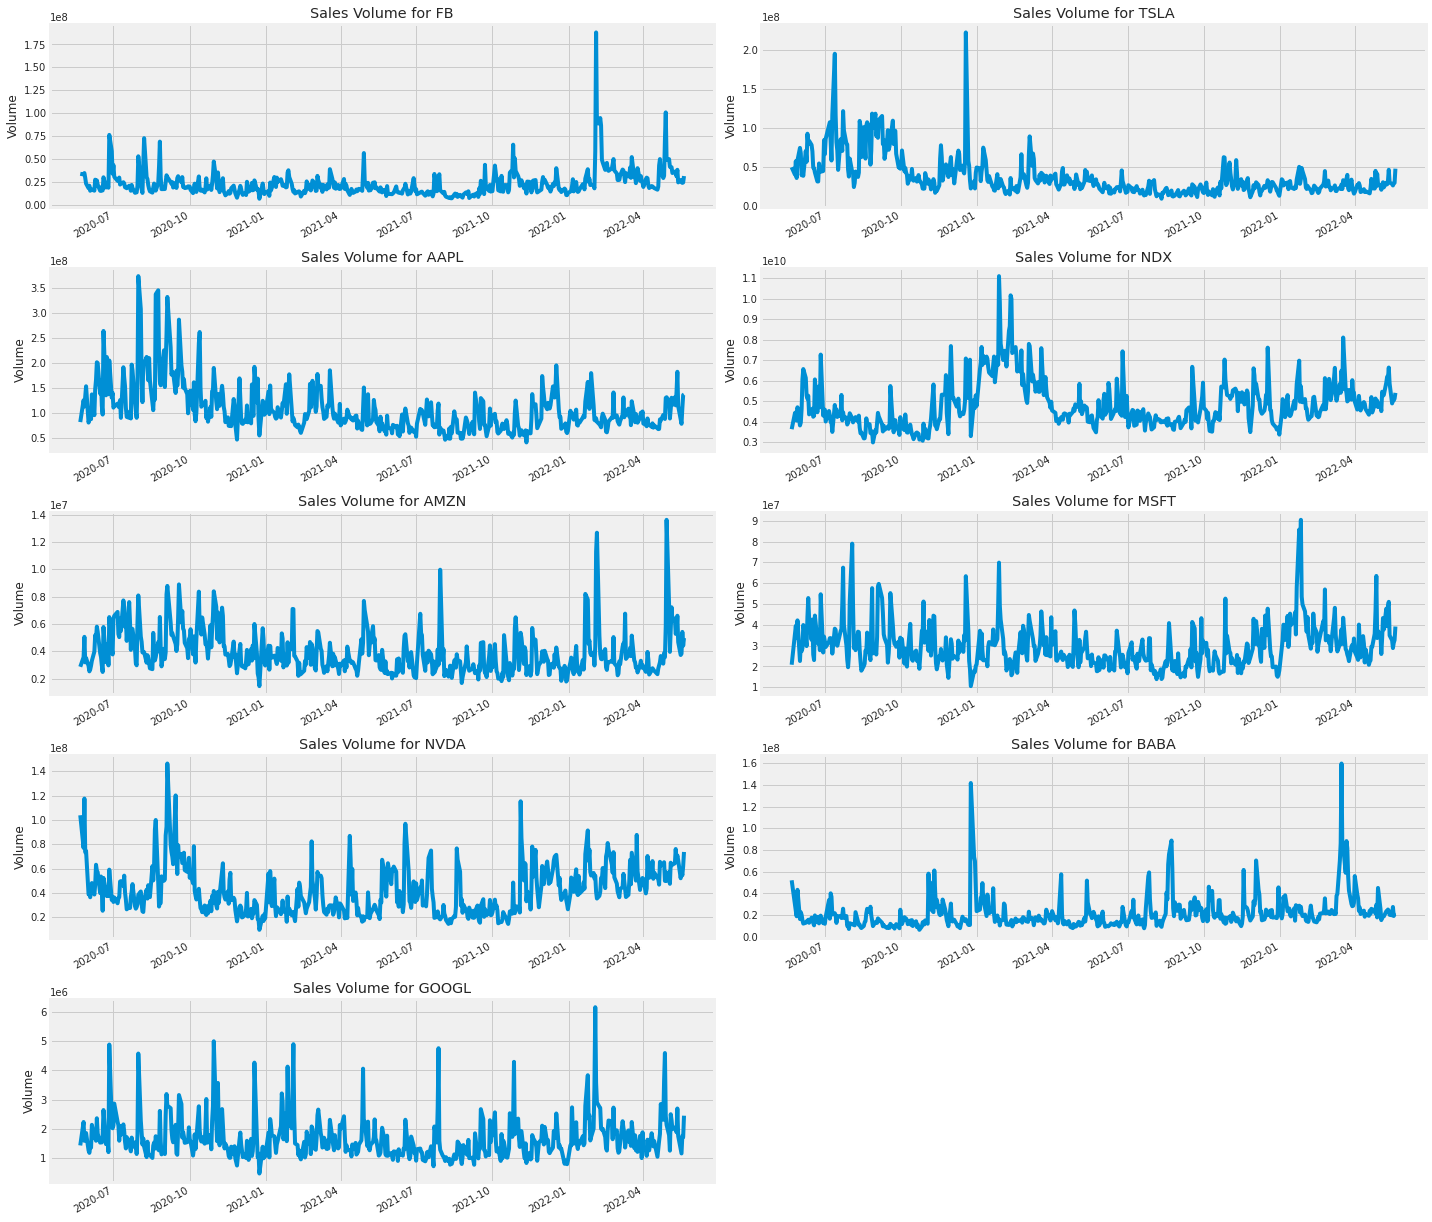

In [8]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(20, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(6, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()
        #f"{str(company)}_MA"[column_name] = f"{str(company)}_MA"['Close'].rolling(ma).mean()
        
NVDA

Adj Close       Close        High         Low        Open  \
Date                                                                     
2020-05-22   90.073669   90.262497   90.930000   87.132500   88.252502   
2020-05-26   86.995132   87.177498   91.817497   86.720001   91.567497   
2020-05-27   85.074158   85.252502   86.327499   79.967499   86.250000   
2020-05-28   84.692459   84.870003   87.605003   83.792503   84.122498   
2020-05-29   88.569321   88.754997   88.754997   84.849998   85.544998   
...                ...         ...         ...         ...         ...   
2022-05-16  172.639999  172.639999  177.880005  171.059998  175.089996   
2022-05-17  181.770004  181.770004  183.710007  176.339996  180.740005   
2022-05-18  169.380005  169.380005  181.179993  168.639999  177.050003   
2022-05-19  171.240005  171.240005  176.869995  167.339996  169.369995   
2022-05-20  166.940002  166.940002  174.100006  157.550003  173.320007   

                 Volume company_name  MA for 10 days  MA for 20 days  \
Date                                                                   
2020-05-22  103876400.0         NVDA             NaN             NaN   
2020-05-26   77078000.0         NVDA             NaN             NaN   
2020-05-27  117589200.0         NVDA             NaN             NaN   
2020-05-28   73489600.0         NVDA             NaN             NaN   
2020-05-29   74525600.0         NVDA             NaN             NaN   
...                 ...          ...             ...             ...   
2022-05-16   52144600.0         NVDA      179.775000      189.060001   
2022-05-17   58583000.0         NVDA      178.350000      187.049501   
2022-05-18   54516100.0         NVDA      174.954001      184.777501   
2022-05-19   62131000.0         NVDA      173.234001      183.248001   
2022-05-20   73731800.0         NVDA      171.253001      181.837502   

            MA for 50 days  
Date                        
2020-05-22             NaN  
2020-05-26             NaN  
2020-05-27             NaN  
2020-05-28             NaN  
2020-05-29             NaN  
...                    ...  
2022-05-16        223.1526  
2022-05-17        222.5176  
2022-05-18        221.6024  
2022-05-19        220.4244  
2022-05-20        219.2316  

[504 rows x 10 columns]

Now let's go ahead and plot all the additional Moving Averages

In [10]:
#df.groupby("company_name").hist()
company_name

['FB', 'TSLA', 'AAPL', 'NDX', 'AMZN', 'MSFT', 'NVDA', 'BABA', 'GOOGL']

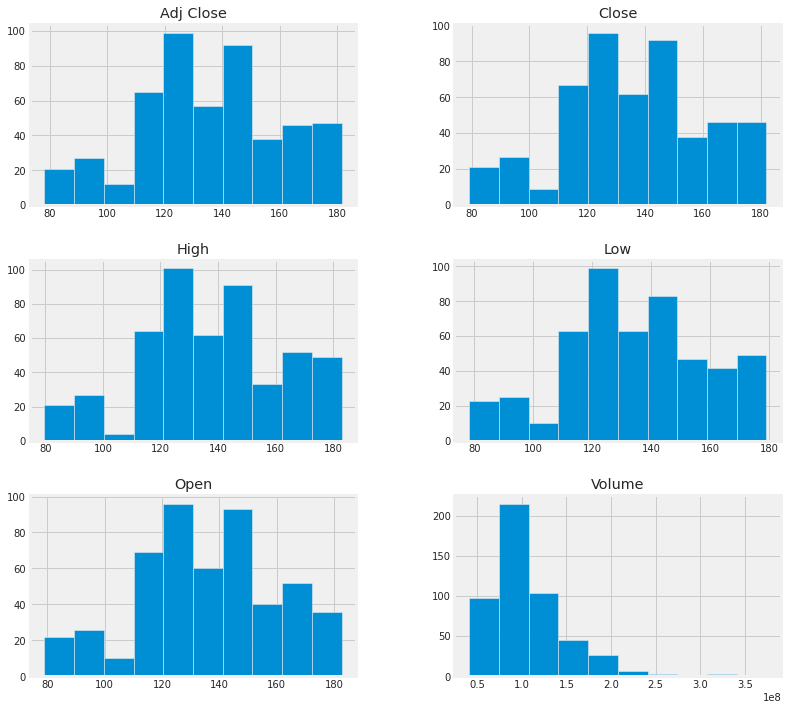

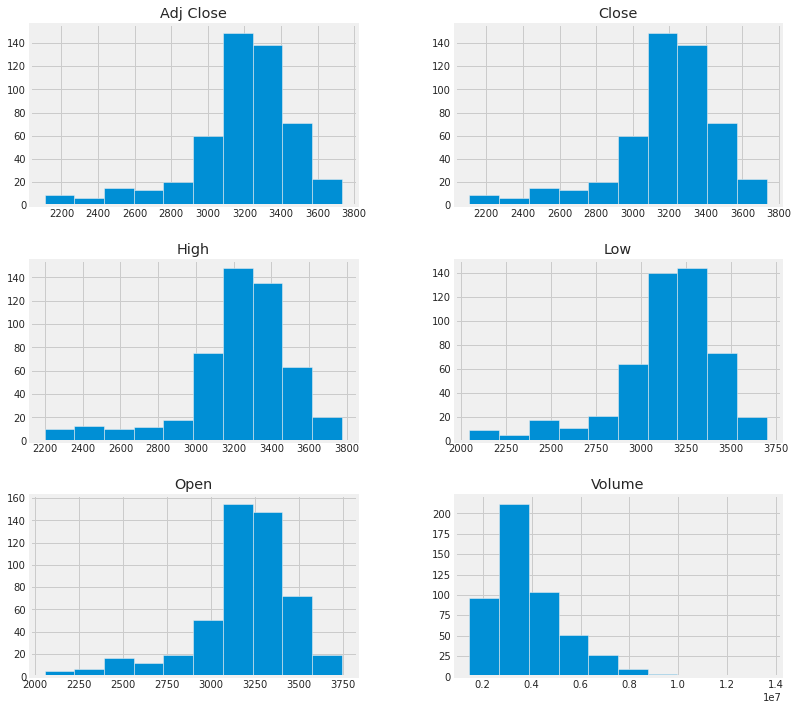

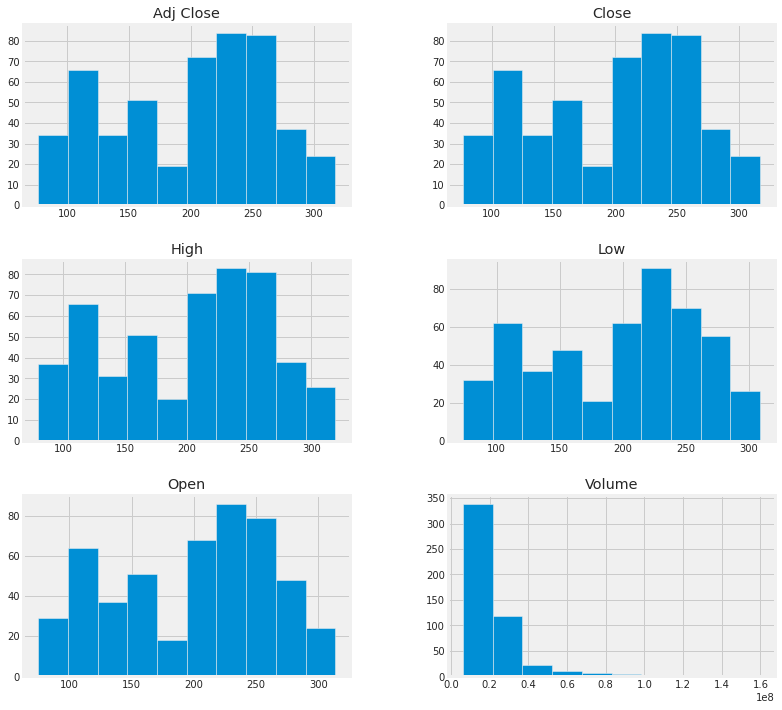

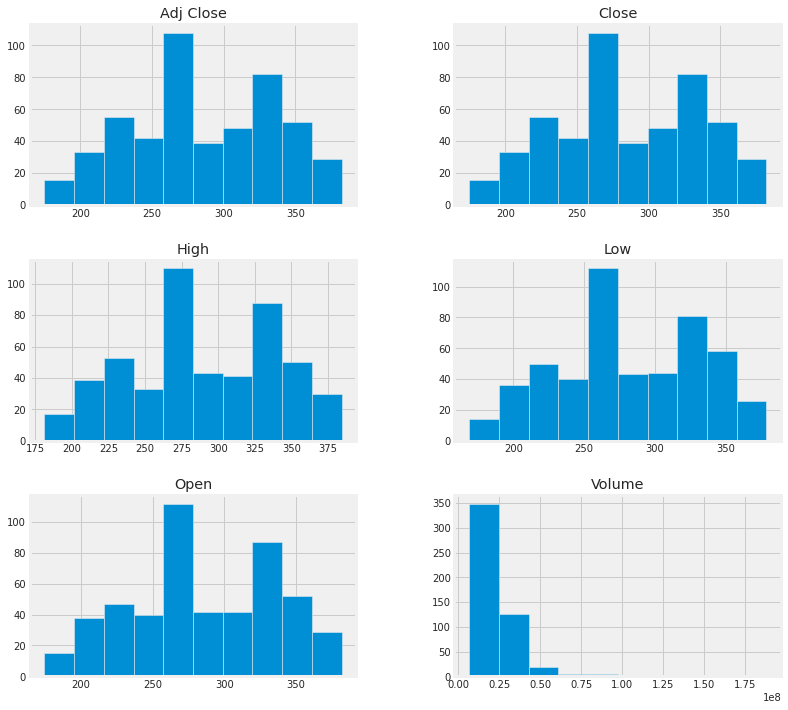

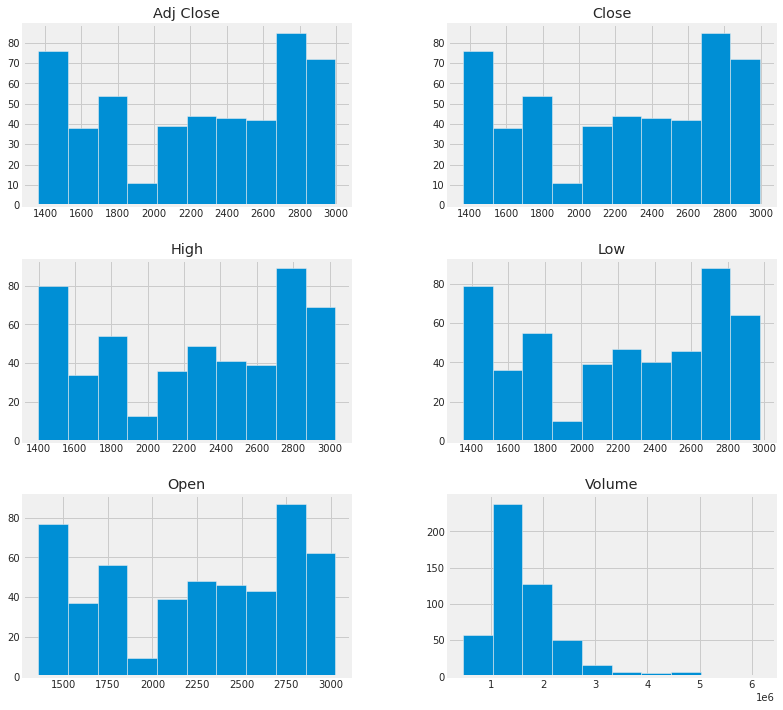

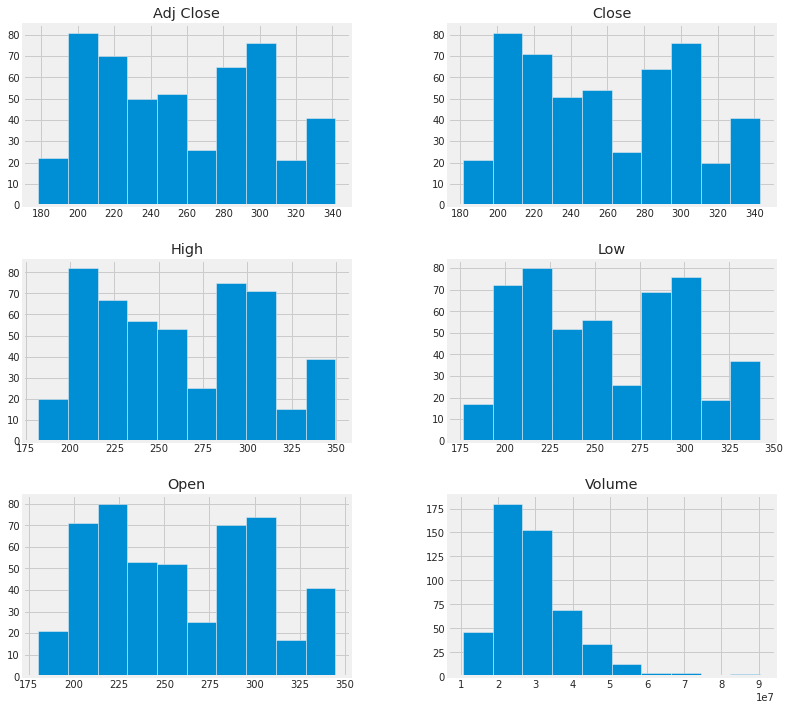

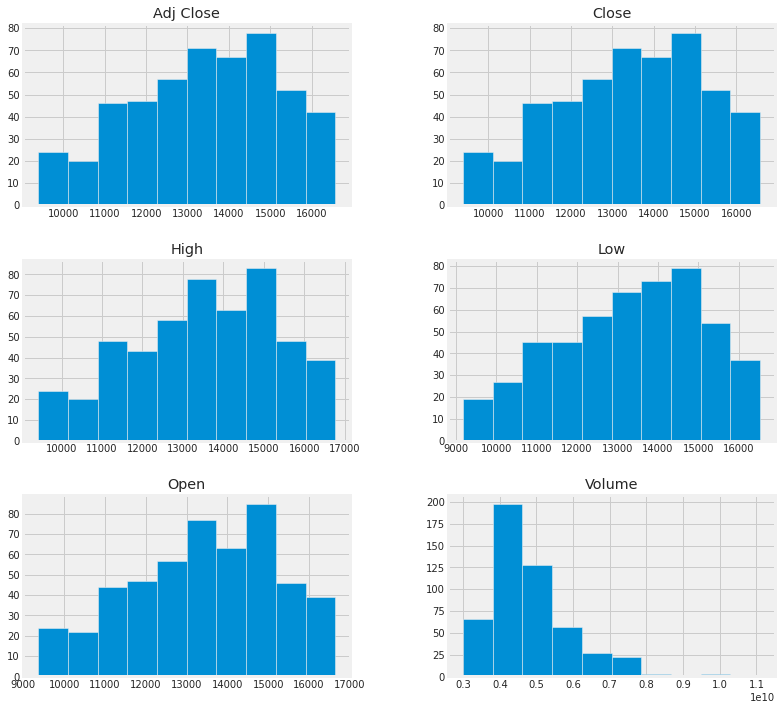

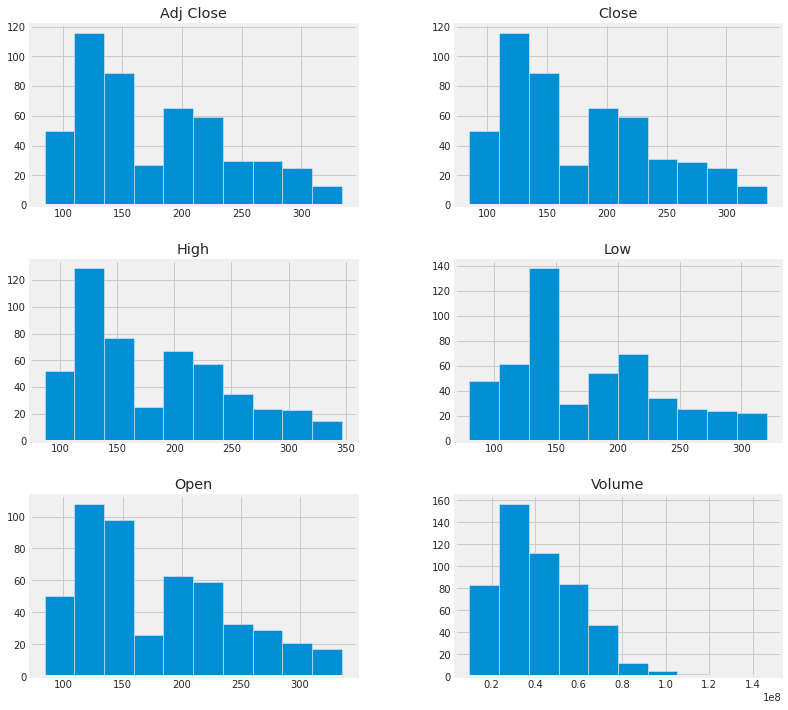

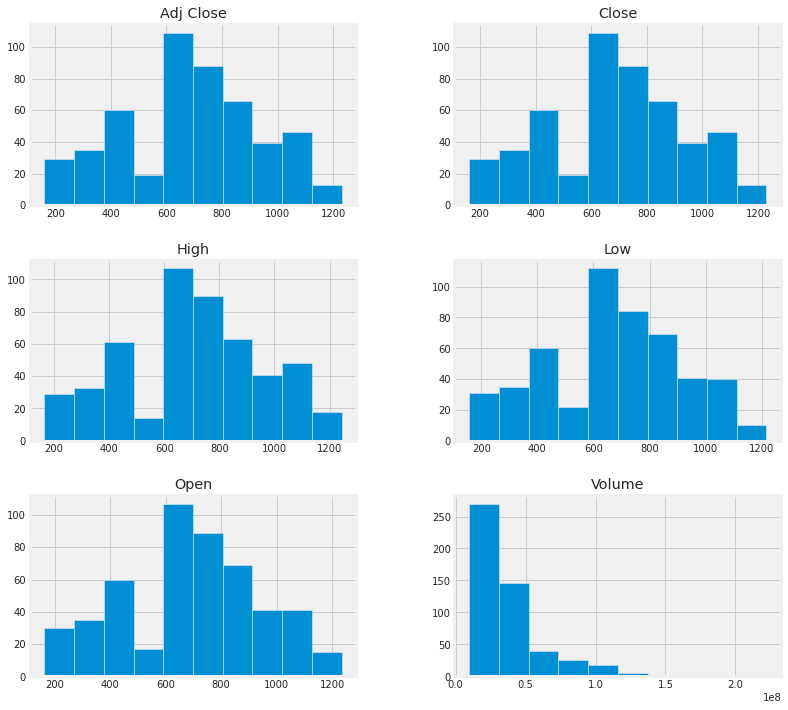

In [11]:
df.groupby("company_name").hist(figsize=(12, 12));   

In [12]:
company_name

['FB', 'TSLA', 'AAPL', 'NDX', 'AMZN', 'MSFT', 'NVDA', 'BABA', 'GOOGL']

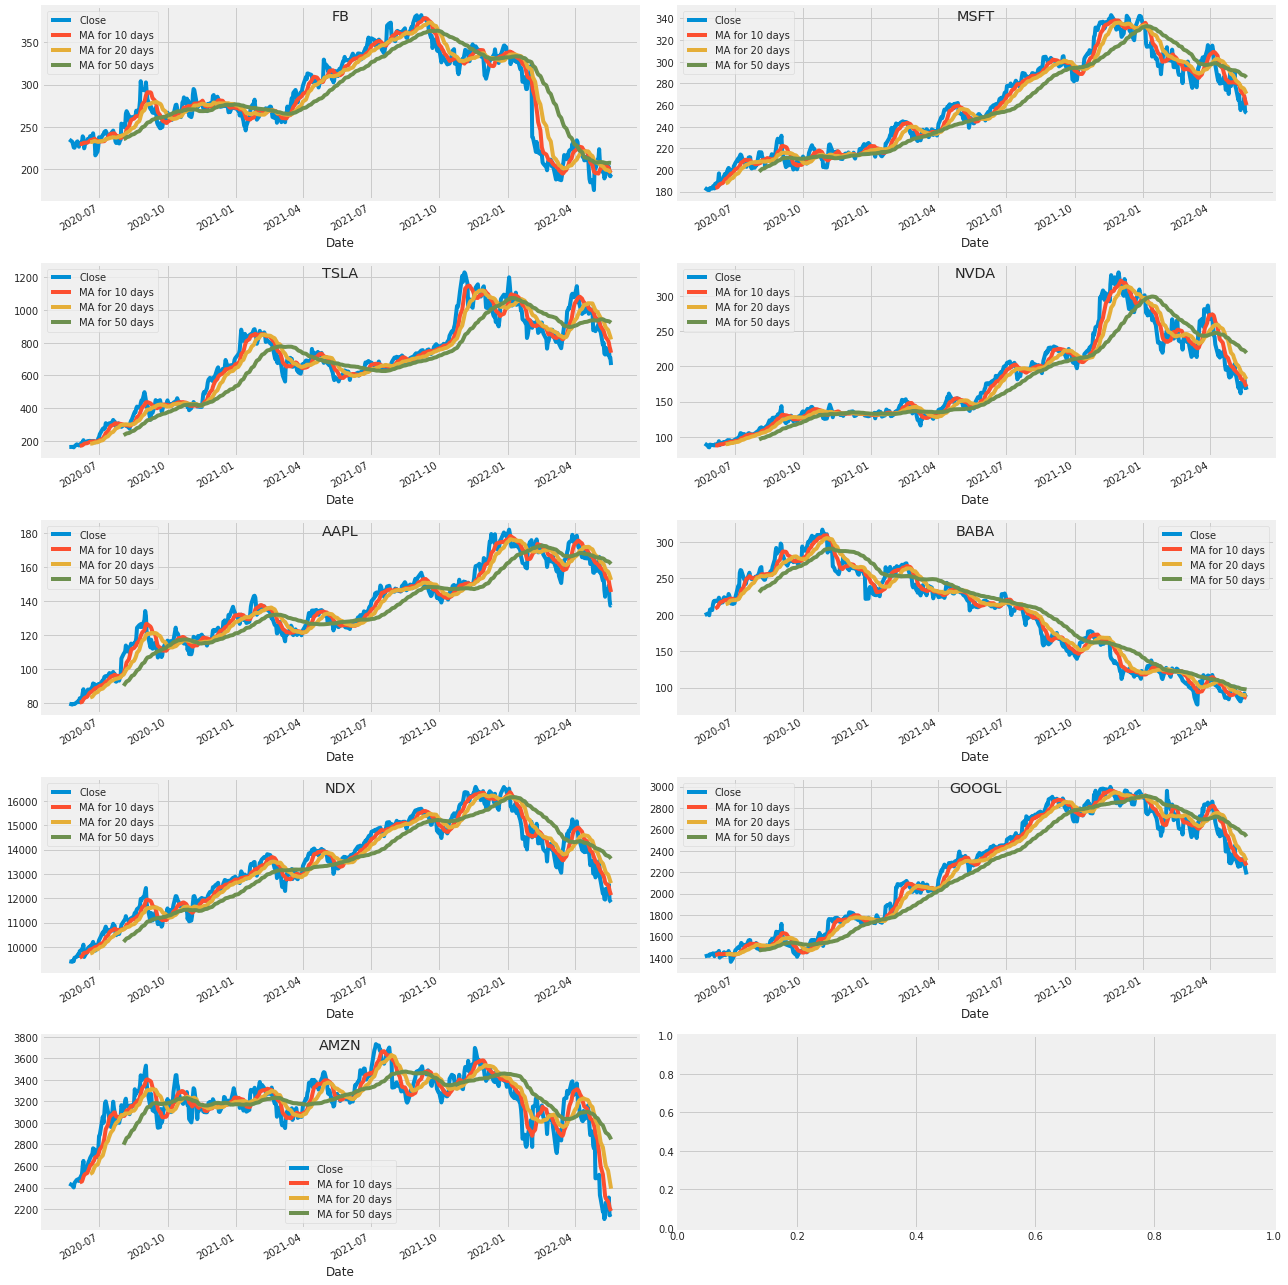

In [13]:

fig, axes = plt.subplots(nrows=5, ncols=2)
fig.set_figheight(18)
fig.set_figwidth(18)

for i in range (0,5):
    #plt.subplot(6, 2, i)
    company_list[i][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[i,0])
    axes[i,0].set_title(company_name[i], y= 1.0, pad=-14)
    
    if i!=4 :
        company_list[i+5][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[i,1])
        axes[i,1].set_title(company_name[i+5], y= 1.0, pad=-14)
    
fig.tight_layout()

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

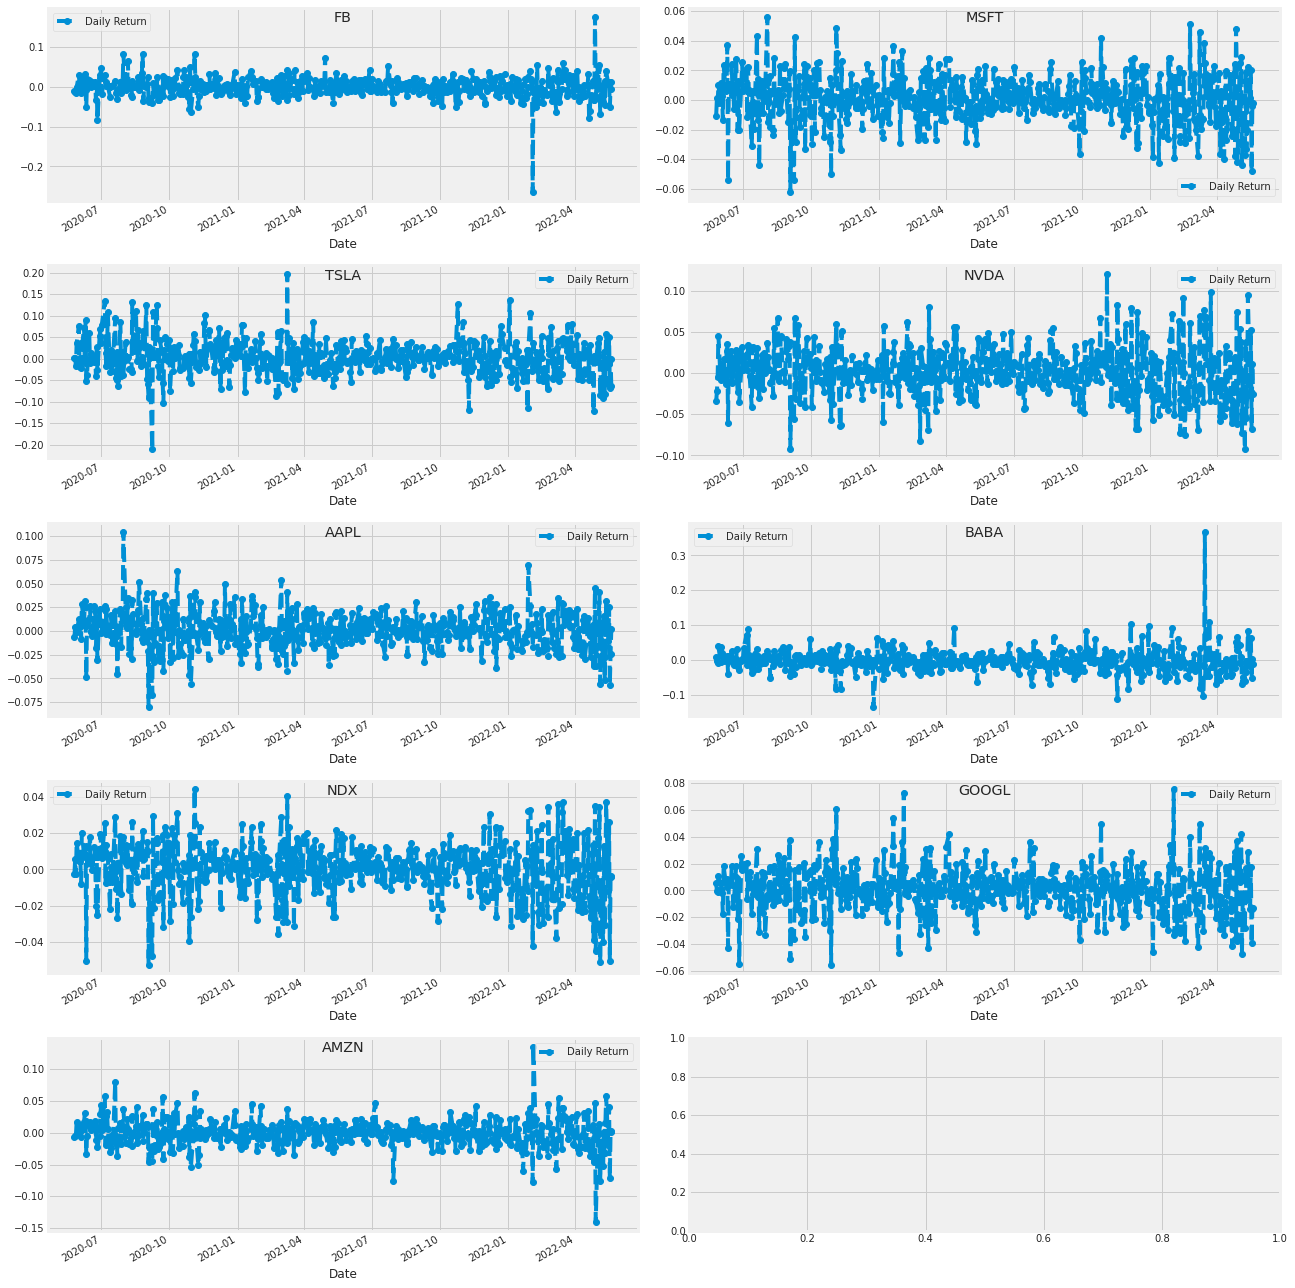

In [14]:

# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

fig, axes = plt.subplots(nrows=5, ncols=2)
fig.set_figheight(18)
fig.set_figwidth(18)

for i in range (0,5):
   
    company_list[i]['Daily Return'].plot(ax=axes[i,0], legend=True, linestyle='--', marker='o')   
    #company_list[i]['Daily Return'].plot(ax=axes[i,0])    
    axes[i,0].set_title(company_name[i], y= 1.0, pad=-14)
    if i != 4:
        company_list[i+5]['Daily Return'].plot(ax=axes[i,1], legend=True, linestyle='--', marker='o')  
        #company_list[i]['Daily Return'].plot(ax=axes[i,0])    
        axes[i,1].set_title(company_name[i+5], y= 1.0, pad=-14)
    
fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

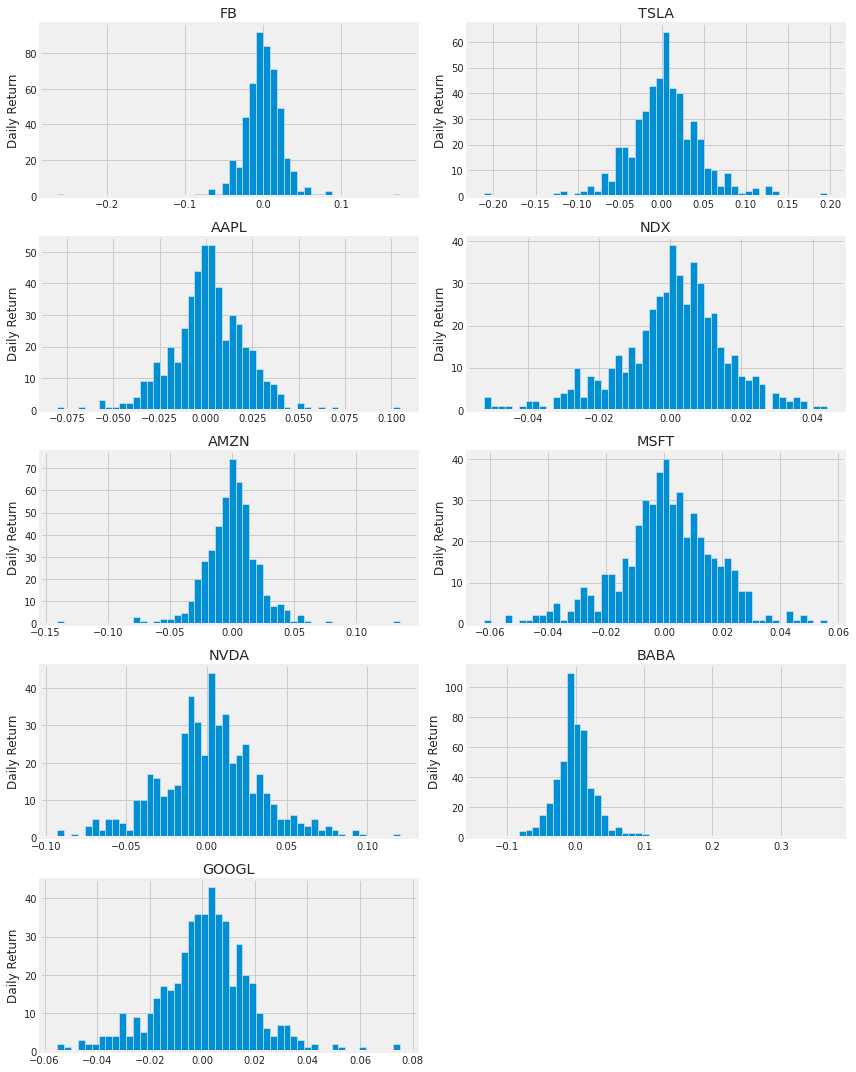

In [15]:
plt.figure(figsize=(12, 15))

for i, company in enumerate(company_list, 1):
    plt.subplot(5, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i-1]}')
    
plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [16]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Close']
closing_df.columns=company_name

# Let's take a quick look
closing_df.head() 

FB        TSLA       AAPL          NDX         AMZN  \
Date                                                                      
2020-05-22  234.910004  163.376007  79.722504  9413.990234  2436.879883   
2020-05-26  232.199997  163.774002  79.182503  9389.980469  2421.860107   
2020-05-27  229.139999  164.046005  79.527496  9442.049805  2410.389893   
2020-05-28  225.460007  161.162003  79.562500  9416.709961  2401.100098   
2020-05-29  225.089996  167.000000  79.485001  9555.530273  2442.370117   

                  MSFT       NVDA        BABA        GOOGL  
Date                                                        
2020-05-22  183.509995  90.262497  199.699997  1413.239990  
2020-05-26  181.570007  87.177498  201.720001  1421.369995  
2020-05-27  181.809998  85.252502  201.179993  1420.280029  
2020-05-28  181.399994  84.870003  199.490005  1418.239990  
2020-05-29  183.250000  88.754997  207.389999  1433.520020

Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [17]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets #.head()

FB      TSLA      AAPL       NDX      AMZN      MSFT  \
Date                                                                     
2020-05-22       NaN       NaN       NaN       NaN       NaN       NaN   
2020-05-26 -0.011536  0.002436 -0.006774 -0.002550 -0.006164 -0.010572   
2020-05-27 -0.013178  0.001661  0.004357  0.005545 -0.004736  0.001322   
2020-05-28 -0.016060 -0.017580  0.000440 -0.002684 -0.003854 -0.002255   
2020-05-29 -0.001641  0.036224 -0.000974  0.014742  0.017188  0.010198   
...              ...       ...       ...       ...       ...       ...   
2022-05-16  0.007149 -0.058759 -0.010672 -0.011610 -0.019853  0.001455   
2022-05-17  0.012897  0.051410  0.025423  0.026179  0.041133  0.020344   
2022-05-18 -0.051229 -0.068014 -0.056419 -0.050604 -0.071562 -0.047748   
2022-05-19 -0.004942 -0.000549 -0.024641 -0.004416  0.001928 -0.003700   
2022-05-20  0.011762 -0.064165  0.001747 -0.003369  0.002535 -0.002291   

                NVDA      BABA     GOOGL  
Date                                      
2020-05-22       NaN       NaN       NaN  
2020-05-26 -0.034178  0.010115  0.005753  
2020-05-27 -0.022081 -0.002677 -0.000767  
2020-05-28 -0.004487 -0.008400 -0.001436  
2020-05-29  0.045776  0.039601  0.010774  
...              ...       ...       ...  
2022-05-16 -0.024963 -0.017161 -0.013835  
2022-05-17  0.052885  0.063714  0.017720  
2022-05-18 -0.068163 -0.050875 -0.039267  
2022-05-19  0.010981  0.004352 -0.013543  
2022-05-20 -0.025111 -0.010263 -0.013372  

[504 rows x 9 columns]

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

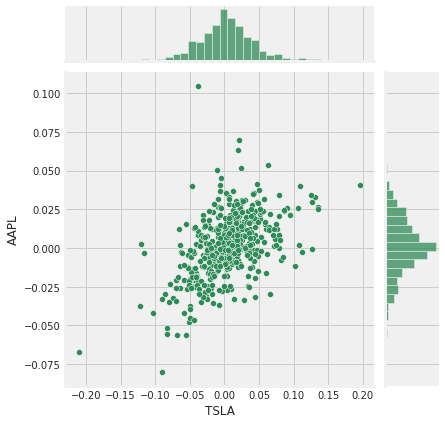

In [18]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='TSLA', y='AAPL', data=tech_rets, kind='scatter', color='seagreen')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

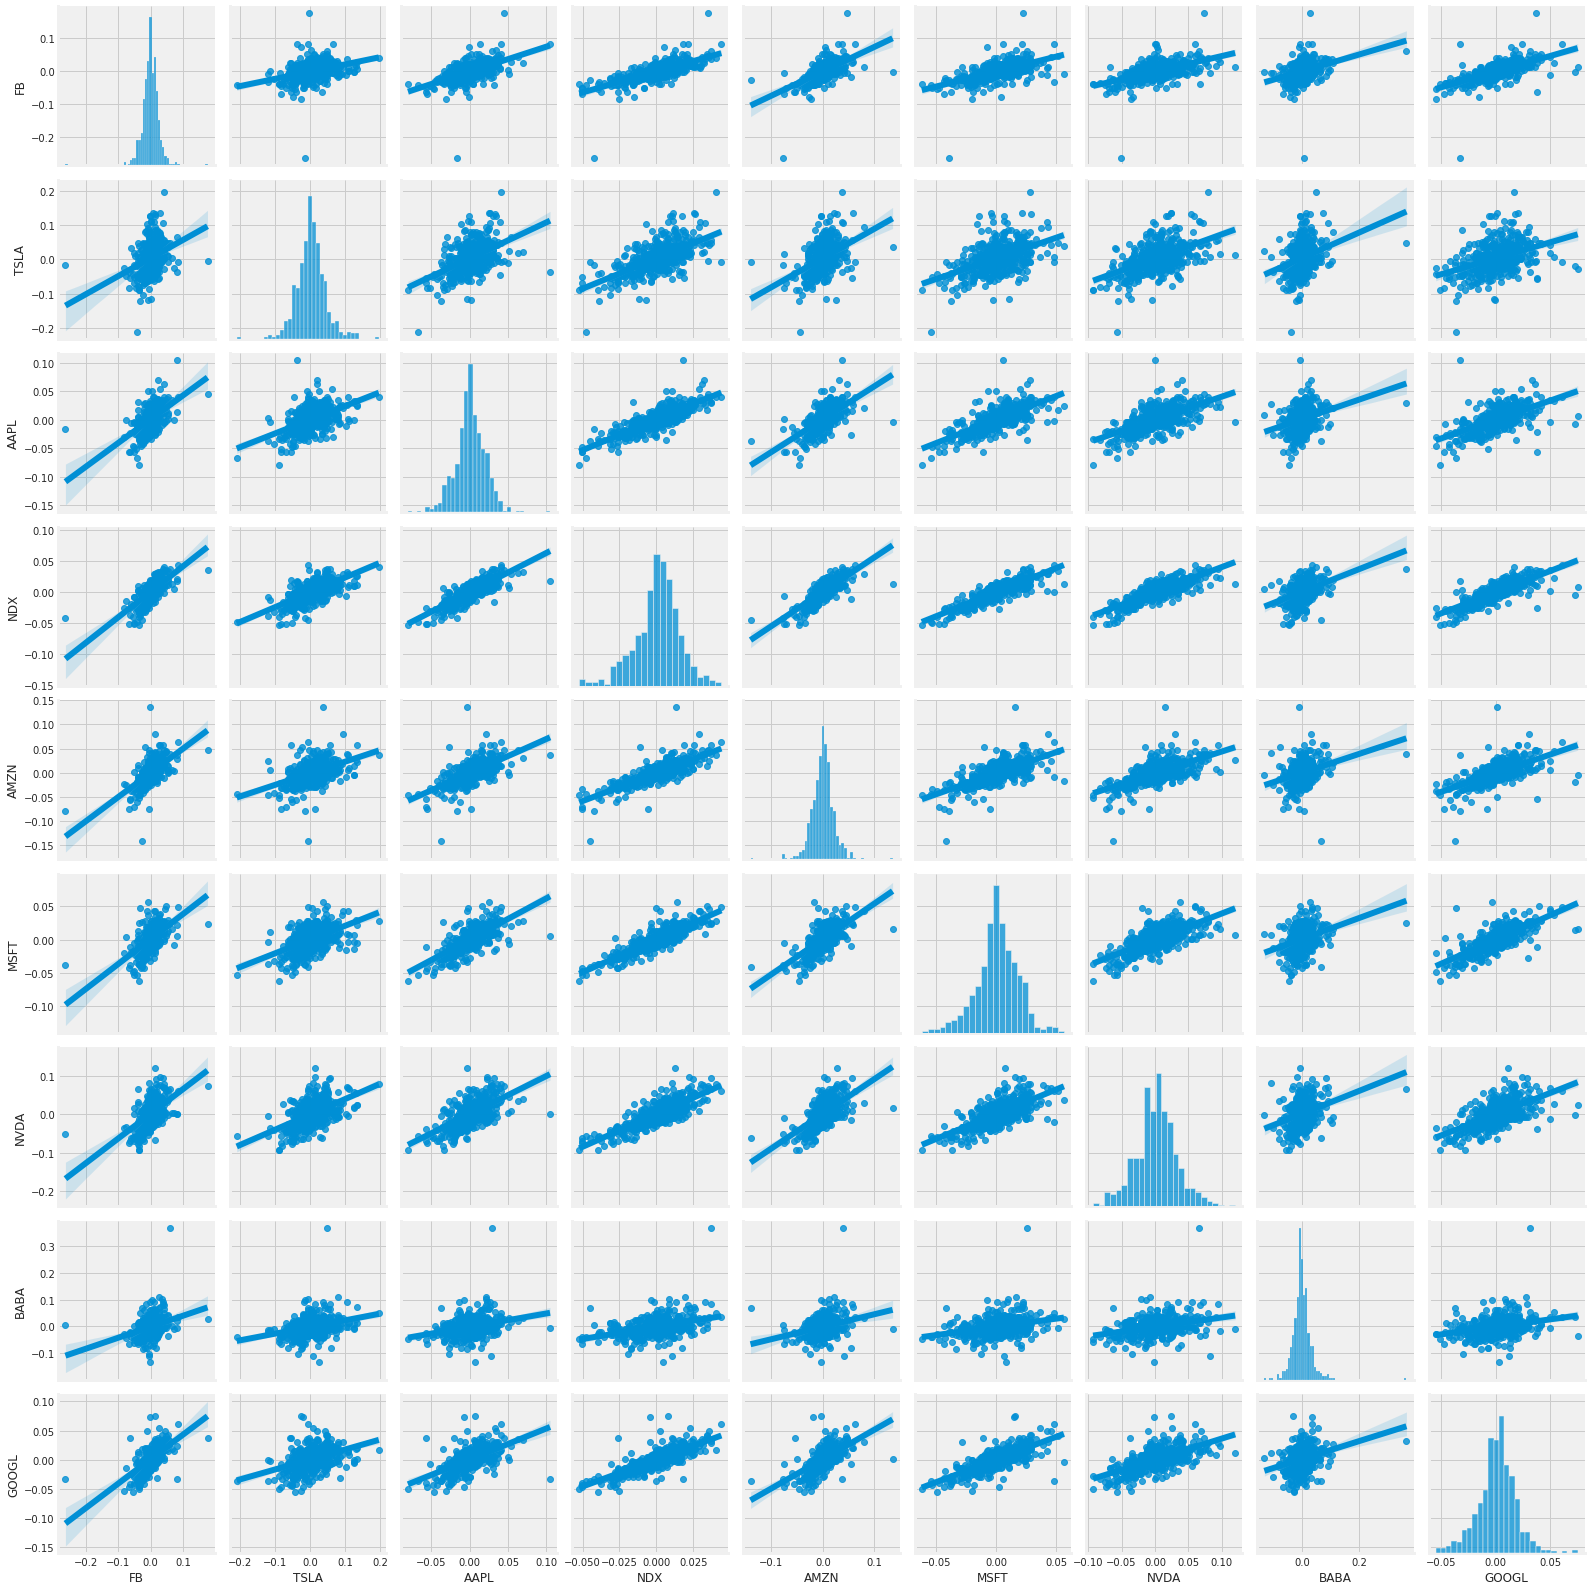

In [19]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

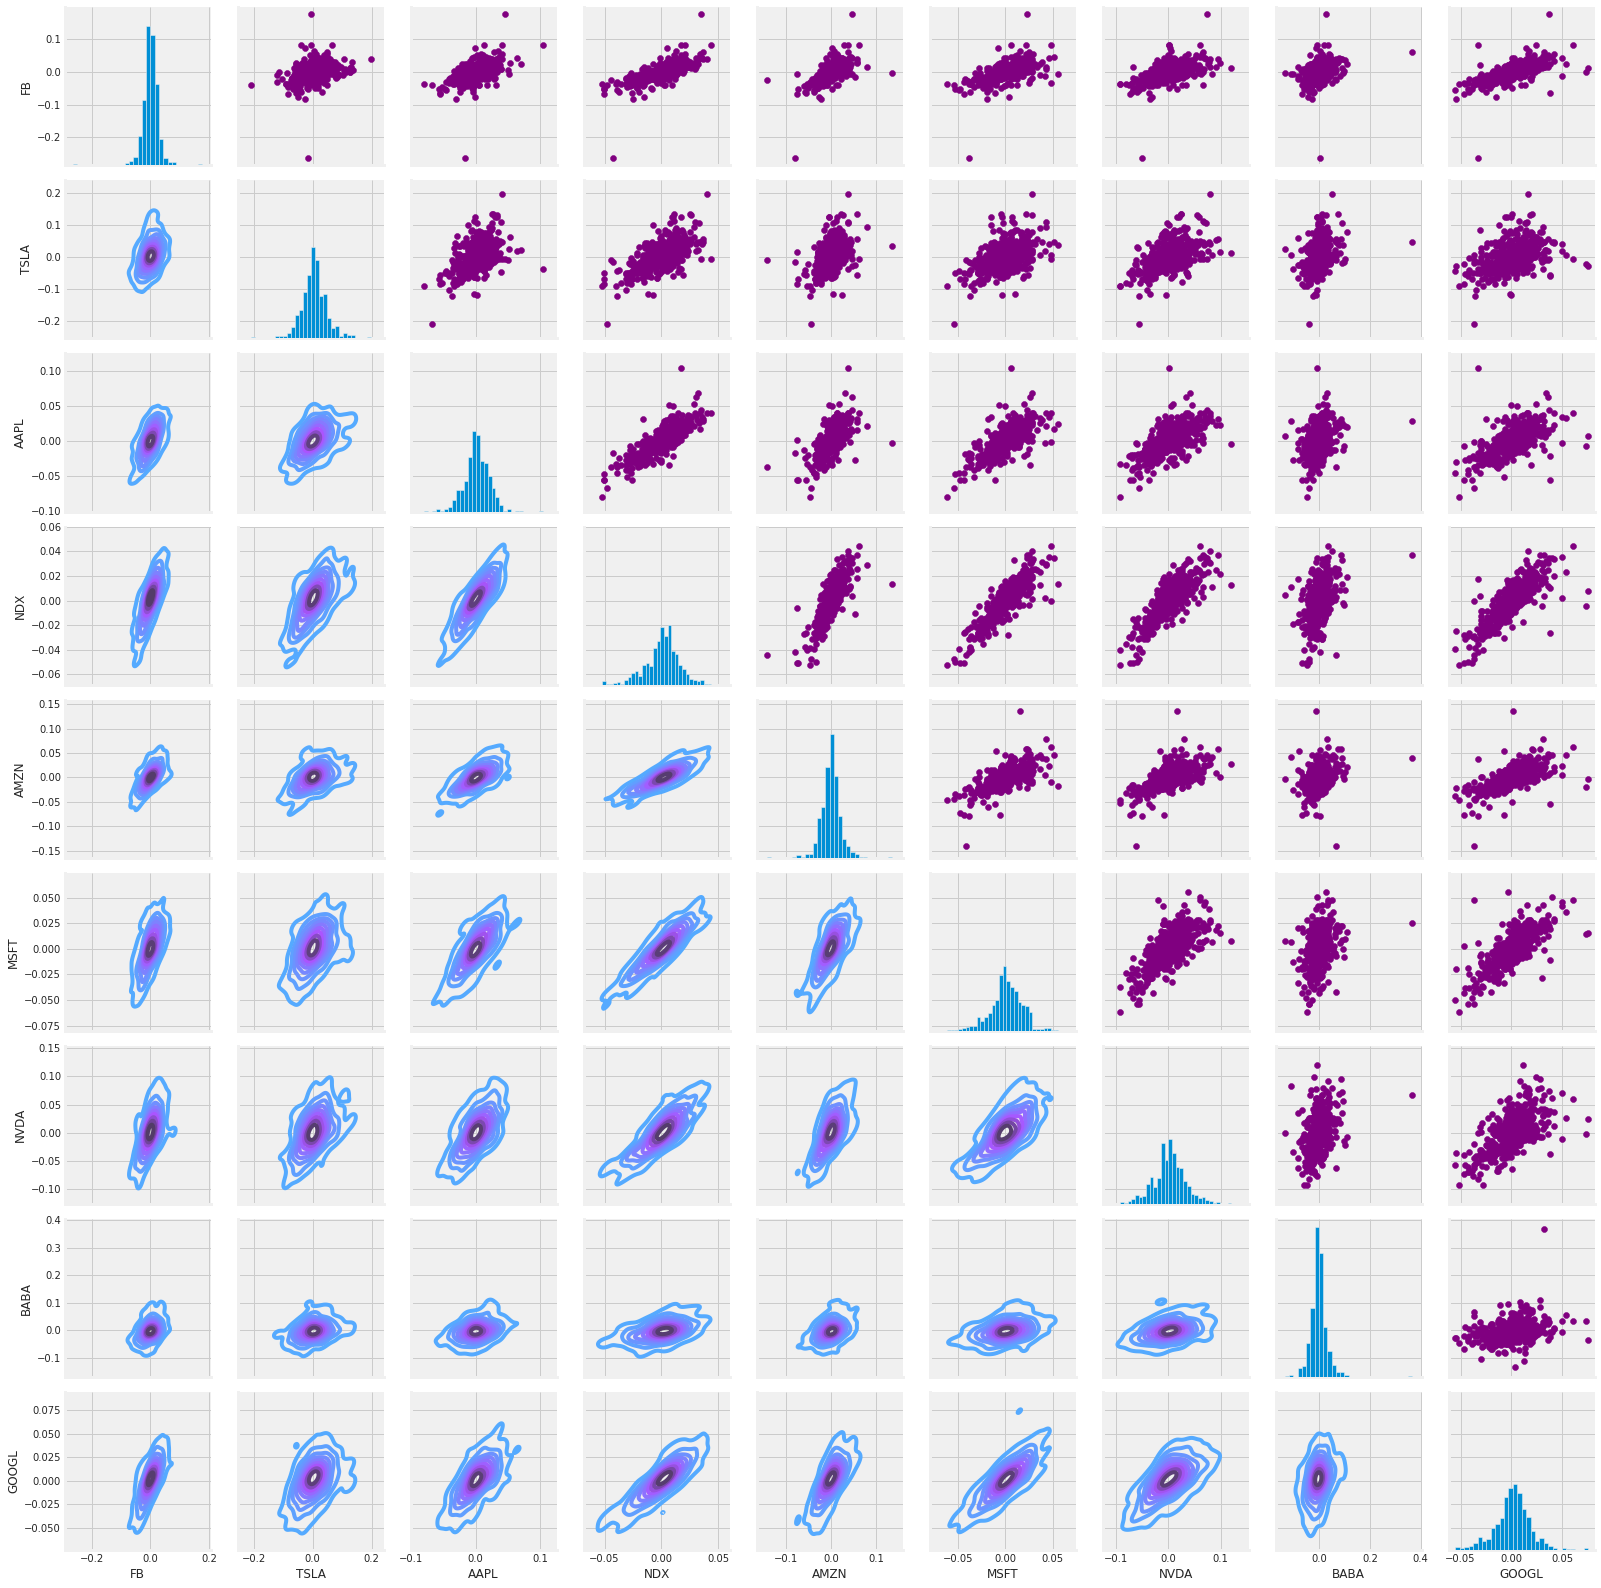

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

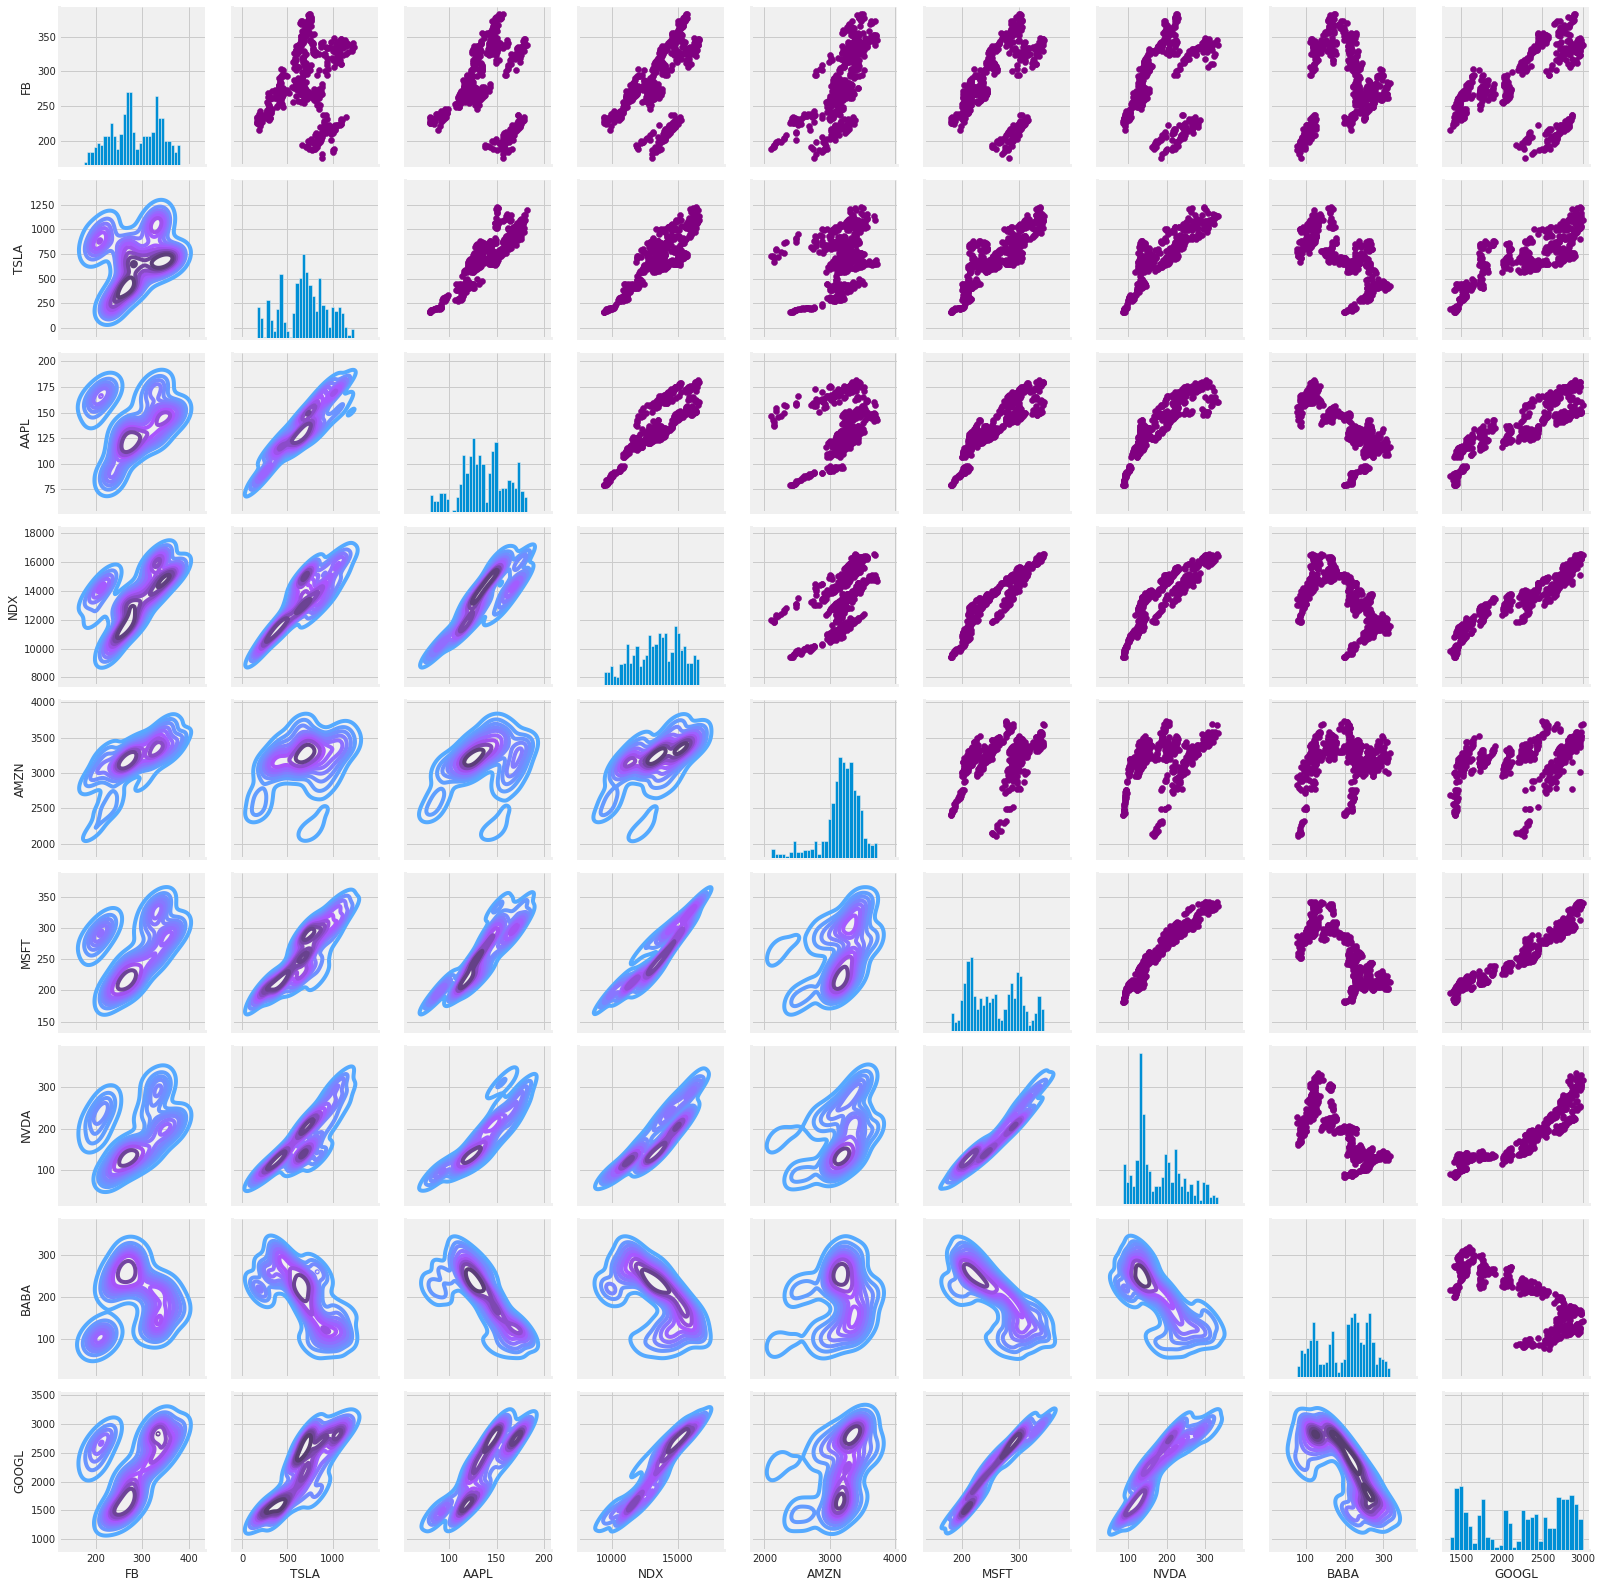

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

<AxesSubplot:>

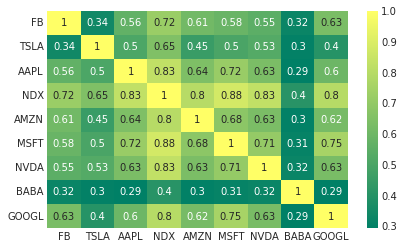

In [22]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:>

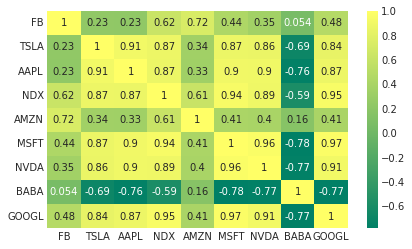

In [23]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

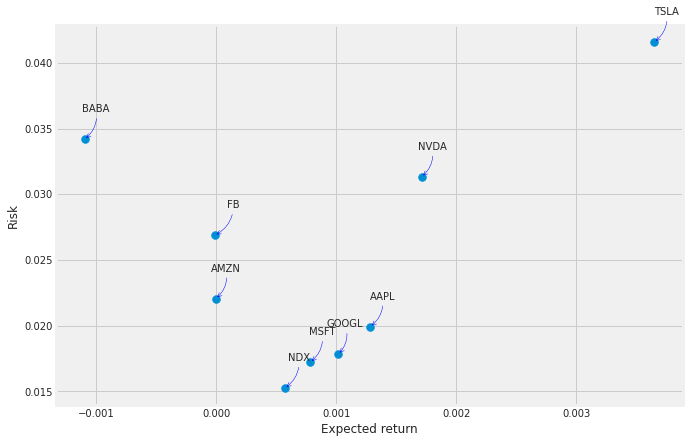

In [24]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

#for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
for label, x, y in zip(company_name, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(25, 25), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='->', color='blue', connectionstyle='arc3,rad=-0.3'))
    

# 6. Predicting the closing price stock price of ... inc:

In [25]:
#company_list=[FB,TSLA,AAPL,NDX,AMZN,MSFT,NVDA,BABA,GOOGL]
#tech_list=['FB','TSLA','AAPL','NDX','AMZN','MSFT','NVDA','BABA','GOOGL']
#company_name=['FB','TSLA','AAPL','NDX','AMZN','MSFT','NVDA','BABA','GOOGL']
company_name

['FB', 'TSLA', 'AAPL', 'NDX', 'AMZN', 'MSFT', 'NVDA', 'BABA', 'GOOGL']

In [26]:
# Get the stock quote
pil_stock = 1
df = DataReader(company_name[pil_stock], data_source='yahoo', start=start, end=datetime.now())   #2012-01-01 ,  2020-05-22
# Show teh data
print(company_name[pil_stock])
df

TSLA


High         Low        Open       Close      Volume  \
Date                                                                     
2020-05-22  166.356003  162.399994  164.434006  163.376007  49937500.0   
2020-05-26  166.919998  163.141998  166.899994  163.774002  40448500.0   
2020-05-27  165.542007  157.000000  164.171997  164.046005  57747500.0   
2020-05-28  164.949997  160.337997  162.701996  161.162003  36278000.0   
2020-05-29  167.000000  160.841995  161.750000  167.000000  58822500.0   
...                ...         ...         ...         ...         ...   
2022-05-23  679.960022  638.059998  655.020020  674.900024  29634500.0   
2022-05-24  653.919983  620.570007  653.530029  628.159973  29697500.0   
2022-05-25  669.320007  623.010010  623.849976  658.799988  30713100.0   
2022-05-26  718.669983  653.659973  661.419983  707.729980  35334400.0   
2022-05-27  759.799988  720.530029  723.250000  759.630005  29630300.0   

             Adj Close  
Date                    
2020-05-22  163.376007  
2020-05-26  163.774002  
2020-05-27  164.046005  
2020-05-28  161.162003  
2020-05-29  167.000000  
...                ...  
2022-05-23  674.900024  
2022-05-24  628.159973  
2022-05-25  658.799988  
2022-05-26  707.729980  
2022-05-27  759.630005  

[509 rows x 6 columns]

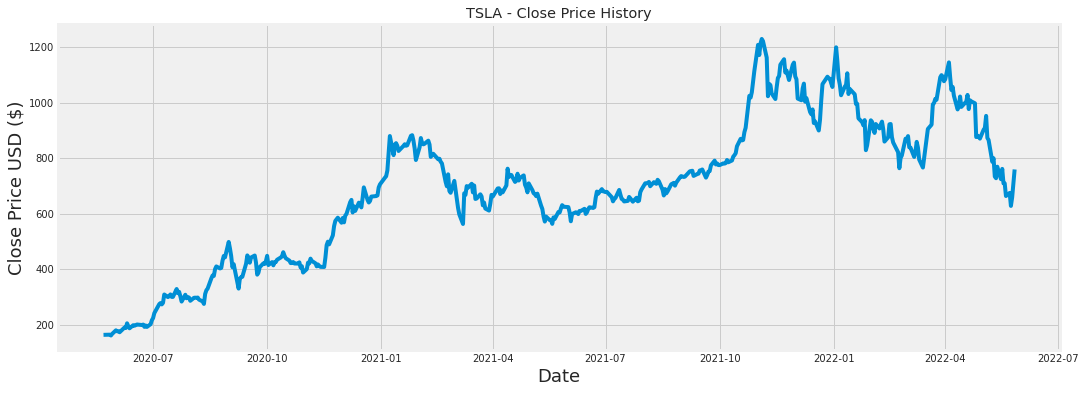

In [27]:
plt.figure(figsize=(16,6))
plt.title(company_name[pil_stock]+' - Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [38]:
def newdataframe (df=df, tambah_hari=5):  #,training_data_len=500):
    # Create a new dataframe with only the 'Close column 
    data = df.filter(['Close']).copy()
    # Convert the dataframe to a numpy array

    #print('')
    #display('data before add date:',data[-3:])
    #print('len(data)',len(data))
    #print('')

    data0 = data[-1:].copy()
    data0['Close'] = np.nan

    tambah_hari=tambah_hari
    for add_date in range(tambah_hari):
        data0.index=data.index.unique()[-1:]+ pd.Timedelta(days=1) 
        data=data.append(data0)
    #display('data after add date:',data[-(tambah_hari+3):])
    #print('len(data)',len(data))
    #print('')

    #dataset = data.values
    # Get the number of rows to train the model on
    #training_data_len = int(np.ceil( len(dataset) * .95 ))
    #training_data_len=training_data_len
    #display('dataset after add date:',dataset[-(tambah_hari+3):])
    #print('len(dataset)',len(dataset))

    return data #,dataset

def scale (data):     
    # Scale the data
    dataset = data.values    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
    #print('Jumlah data=',len(scaled_data))
    #scaled_data[-10:]
    return scaled_data, scaler

In [31]:
def training_data (scaled_data,training_data_len=500,num_rows=5):
    # Create the training data set 
    #num_rows = 5
    train_data = scaled_data[0:int(training_data_len), :]
    # Split the data into x_train and y_train data sets
    x_train = []
    y_train = []

    for i in range(num_rows, len(train_data)):
        #print('data ',i-num_rows,'-',i)
        x_train.append(train_data[i-num_rows:i, 0])
        y_train.append(train_data[i, 0])
        """
        if i<= num_rows+2:
            print('data ',i-num_rows,'-',i)
            print('x_train:',x_train[i-num_rows:i])
            print('y_train:',y_train[i-num_rows:i])
            print('')
        if (i == 100) | (i == 101) | (i == 102) :  # | (.5*len(train_data)+1 )):
            print('               ...')

        if i>= len(train_data)-2:
            print('data ',i-num_rows,'-',i)
            print('x_train:',x_train[i-num_rows:i])
            print('y_train:',y_train[i-num_rows:i])
            print('')    
        """

    # Convert the x_train and y_train to numpy arrays 
    x_train, y_train = np.array(x_train), np.array(y_train)
    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    # x_train.shape
    
    return x_train, y_train

In [32]:
def build_model(x_train, y_train,batch_size=10, epochs=5):
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    #Compile the model RMSprop Ver1 (very good)
    model.compile(optimizer='RMSprop', loss='mean_squared_error')

    # Compile the model adam (good)
    #model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, batch_size=10, epochs=5)
    
    return model

In [33]:
def testing_data(data, training_data_len, num_rows):
    # Create the testing data set
    test_data = scaled_data[training_data_len - num_rows: , :]
    # Create the data sets x_test and y_test
    x_test = []
    dataset=data.values
    y_test = dataset[training_data_len:, :]
    for i in range(num_rows, len(test_data)):
        x_test.append(test_data[i-num_rows:i, 0])

    # Convert the data to a numpy array
    x_test = np.array(x_test)

    # Reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
    #print('x_test',x_test.shape)
    #print(x_test[-5:]) 
    #print('')
    #print('y_test',y_test.shape)
    #print(y_test[-5:])
    return x_test, y_test

In [43]:
#parameter
tambah_hari=5
training_data_len=405
num_rows=5

#print('--------------')
data=newdataframe(df,tambah_hari)
scaled_data, scaler=scale(data)
x_train, y_train = training_data(scaled_data,training_data_len,num_rows)
#print('--------------')

model=build_model(x_train, y_train,batch_size=50, epochs=150)
model
x_test, y_test = testing_data(data, training_data_len, num_rows)

predictions0 = model.predict(x_test)
#print(predictions0)

predictions = scaler.inverse_transform(predictions0)
#print(predictions)

valid = data[training_data_len:]
valid['Predictions'] = predictions
valid['Close']=valid['Close'].fillna(valid['Predictions'])
print(valid)

Epoch 1/5
40/40 [==============================] - 3s 7ms/step - loss: 0.0141
Epoch 2/5
40/40 [==============================] - 0s 7ms/step - loss: 0.0049
Epoch 3/5
40/40 [==============================] - 0s 7ms/step - loss: 0.0042
Epoch 4/5
40/40 [==============================] - 0s 7ms/step - loss: 0.0036
Epoch 5/5
40/40 [==============================] - 0s 7ms/step - loss: 0.0040
                  Close  Predictions
Date                                
2021-12-30  1070.339966  1151.300049
2021-12-31  1056.780029  1171.614014
2022-01-03  1199.780029  1172.911987
2022-01-04  1149.589966  1179.914429
2022-01-05  1088.119995  1192.497314
...                 ...          ...
2022-05-28   735.273743   735.273743
2022-05-29          NaN          NaN
2022-05-30          NaN          NaN
2022-05-31          NaN          NaN
2022-06-01          NaN          NaN

[109 rows x 2 columns]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## The previous cells created np arrays in which each element is an array with num_rolws # of elements

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


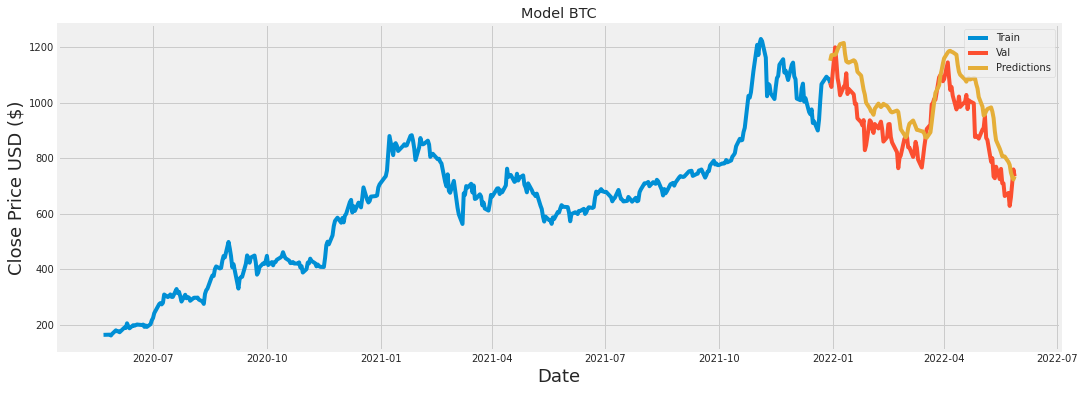

In [48]:
# Plot the data
train = data[:training_data_len+1]
train = train[:]
valid2 = data[training_data_len:]
valid2['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model BTC')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid2[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')  #'lower right')
plt.show()

In [ ]:
valid2